In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
dataset = loadmat('face_emotion_data.mat')

X, y = dataset['X'], dataset['y']
n, p = np.shape(X)

X = np.hstack((np.ones((n,1)), X))  # append a column of ones

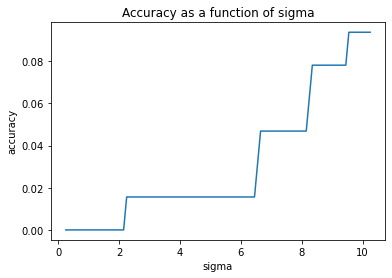

In [49]:
# 1a & 1b
lam = 0.5
sigma_params = np.linspace(.25, 10.25, 101)
error = []
for sigma in sigma_params:
  distsq=np.zeros((n,n),dtype=float)

  for i in range(0,n):
    for j in range(0,n):
        d = np.linalg.norm(X[i,:]-X[j,:])
        distsq[i,j]=d**2
  K = np.exp(-distsq/(2*sigma**2))
  alpha = np.linalg.inv(K+lam*np.identity(n))@y
  Y_hat = np.zeros((y.shape))

  for i in range(X.shape[0]):
    Y_hat[[i],:] = np.exp(-np.linalg.norm(X - X[[i], :], axis=1)**2/(2*sigma**2))@alpha

  error.append(np.sum(abs(np.sign(Y_hat)-y))/y.shape[0])

# Plot the accuracy as a function of sigma
plt.plot(sigma_params, error)
plt.xlabel('sigma')
plt.ylabel('accuracy')
plt.title('Accuracy as a function of sigma')
plt.show()


In [50]:
# 1c
error = []

sigma_avg_error = np.zeros(sigma_params.shape)

xSub = [X[i::8] for i in range(8)] 
ySub = [y[i::8] for i in range(8)]

for l in range(8):
  xTrain = np.vstack([xSub[k] for k in range(8) if k != l])
  yTrain = np.vstack([ySub[k] for k in range(8) if k != l])
  min_error, min_sigma = 1.0, -1
  for sigma in sigma_params:
    distsq=np.zeros((int(n * 7/8),int(n * 7/8)),dtype=float)

    for i in range(0,int(n * 7/8)):
      for j in range(0,int(n * 7/8)):
        d = np.linalg.norm(xTrain[i,:]-xTrain[j,:])
        distsq[i,j]=d**2

    K = np.exp(-distsq/(2*sigma**2))
    alpha = np.linalg.inv(K+lam*np.identity(int(n * 7/8)))@yTrain
    Y_hat = np.zeros((np.shape(ySub[l])))

    for j in range(0,xSub[l].shape[0]):
      pred_sum = 0
      for k in range(0, xTrain.shape[0]):
          pred_sum = pred_sum + np.exp(-np.linalg.norm(xSub[l][j] - xTrain[k, :])**2/(2*sigma**2))*alpha[k, 0]
      Y_hat[j, :] = np.sign(pred_sum)
      
    err = np.sum(abs(Y_hat-ySub[l]))/Y_hat.shape[0]
    sigma_avg_error[int((sigma-.25)/.1)] += err/8
    if err < min_error:
        min_error = err
        min_sigma = sigma
            
  print("lambda = " + str(min_sigma) + " error : " + str(min_error))

lambda = 3.75 error : 0.0
lambda = 1.05 error : 0.125
lambda = 0.25 error : 0.0
lambda = 1.05 error : 0.0
lambda = 3.0500000000000003 error : 0.0
lambda = 2.05 error : 0.125
lambda = 3.1500000000000004 error : 0.0
lambda = 4.55 error : 0.0


In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
x = df['day_of_year']
d = df['secchi_depth']
n = x.shape[0]

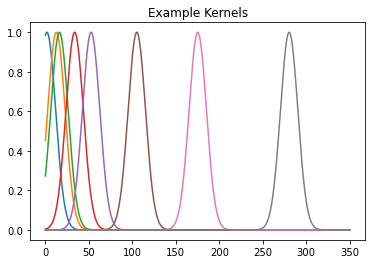

In [57]:
# 2a
sigma = 10
p = 1000

# Display examples of the kernels
x_test = np.linspace(0,350.00,p)  # uniformly sample interval [0,1]
j_list = [5, 36, 46, 96, 150, 300, 500, 800]  #list of indices for example kernels 

Kdisplay = np.zeros((p,len(j_list)),dtype=float)

for i in range(p):
    for j in range(len(j_list)):
        Kdisplay[i,j]= np.exp(-(x_test[i]-x_test[j_list[j]])**2/(2*sigma**2))

plt.plot(x_test, Kdisplay)
plt.title('Example Kernels')
plt.show()

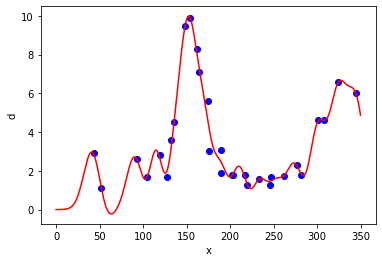

In [58]:
# 2b
lam = 0.01
distsq=np.zeros((n,n),dtype=float)

for i in range(0,n):
    for j in range(0,n):
        distsq[i,j]=(x[i]-x[j])**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@d

distsq_xtest = np.zeros((p,n),dtype=float)
for i in range(0,p):
    for j in range(0,n):
        distsq_xtest[i,j] = (x_test[i]-x[j])**2
        
dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha


plt.plot(x,d,'bo',label='Measured data')
plt.plot(x_test,dtest,'r',label='Kernel fit')
plt.xlabel('x')
plt.ylabel('d')
plt.show()